In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sn

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/netflix-tv-shows-and-movies/credits.csv
/kaggle/input/netflix-tv-shows-and-movies/titles.csv


In [2]:
df = pd.read_csv('/kaggle/input/netflix-tv-shows-and-movies/titles.csv')
df.head()

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,ts300399,Five Came Back: The Reference Films,SHOW,This collection includes 12 World War II-era p...,1945,TV-MA,48,['documentation'],['US'],1.0,NaN,NaN,NaN,0.600,NaN
1,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,113,"['crime', 'drama']",['US'],NaN,tt0075314,8.3,795222.0,27.612,8.2
2,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,"['comedy', 'fantasy']",['GB'],NaN,tt0071853,8.2,530877.0,18.216,7.8
3,tm70993,Life of Brian,MOVIE,"Brian Cohen is an average young Jewish man, bu...",1979,R,94,['comedy'],['GB'],NaN,tt0079470,8.0,392419.0,17.505,7.8
4,tm190788,The Exorcist,MOVIE,12-year-old Regan MacNeil begins to adapt an e...,1973,R,133,['horror'],['US'],NaN,tt0070047,8.1,391942.0,95.337,7.7


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5806 entries, 0 to 5805
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    5806 non-null   object 
 1   title                 5805 non-null   object 
 2   type                  5806 non-null   object 
 3   description           5788 non-null   object 
 4   release_year          5806 non-null   int64  
 5   age_certification     3196 non-null   object 
 6   runtime               5806 non-null   int64  
 7   genres                5806 non-null   object 
 8   production_countries  5806 non-null   object 
 9   seasons               2047 non-null   float64
 10  imdb_id               5362 non-null   object 
 11  imdb_score            5283 non-null   float64
 12  imdb_votes            5267 non-null   float64
 13  tmdb_popularity       5712 non-null   float64
 14  tmdb_score            5488 non-null   float64
dtypes: float64(5), int64(

In [4]:
df.describe()

,release_year,runtime,seasons,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
count,5806.000000,5806.000000,2047.000000,5283.000000,5.267000e+03,5712.000000,5488.000000
mean,2016.013434,77.643989,2.165608,6.533447,2.340719e+04,22.525660,6.818039
std,7.324883,39.474160,2.636207,1.160932,8.713432e+04,68.849177,1.171560
min,1945.000000,0.000000,1.000000,1.500000,5.000000e+00,0.009442,0.500000
25%,2015.000000,44.000000,1.000000,5.800000,5.210000e+02,3.155250,6.100000
50%,2018.000000,84.000000,1.000000,6.600000,2.279000e+03,7.478000,6.900000
75%,2020.000000,105.000000,2.000000,7.400000,1.014400e+04,17.775750,7.500000
max,2022.000000,251.000000,42.000000,9.600000,2.268288e+06,1823.374000,10.000000


In [5]:
df.corr()

,release_year,runtime,seasons,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
release_year,1.000000,-0.211076,-0.505831,-0.102849,-0.196988,0.025628,0.049107
runtime,-0.211076,1.000000,-0.132740,-0.159297,0.138610,-0.027493,-0.285232
seasons,-0.505831,-0.132740,1.000000,0.097727,0.212645,0.331362,0.026796
imdb_score,-0.102849,-0.159297,0.097727,1.000000,0.189954,0.023159,0.587675
imdb_votes,-0.196988,0.138610,0.212645,0.189954,1.000000,0.201813,0.109720
tmdb_popularity,0.025628,-0.027493,0.331362,0.023159,0.201813,1.000000,0.068405
tmdb_score,0.049107,-0.285232,0.026796,0.587675,0.109720,0.068405,1.000000


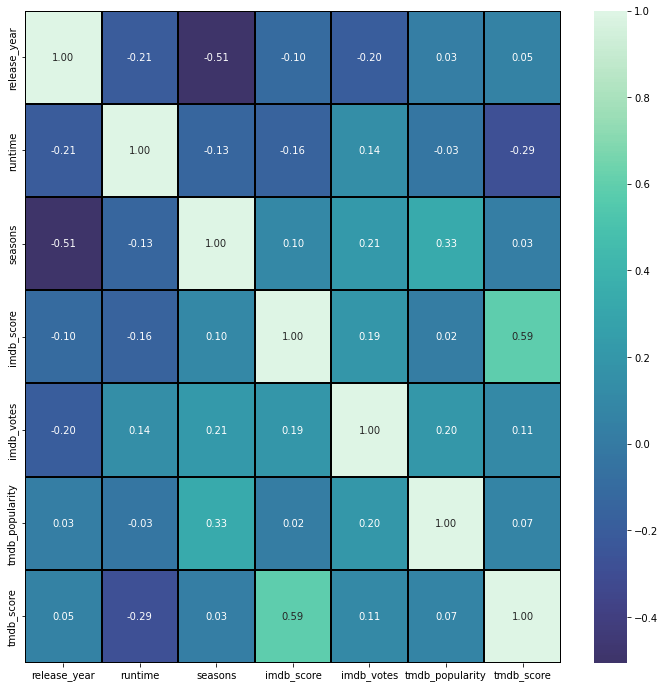

In [6]:
f,ax = plt.subplots(figsize=(12,12))
sn.heatmap(df.corr(),annot=True,fmt='.2f',ax=ax,center= 0,cmap= 'mako',linewidths=2, linecolor='black')
plt.show()

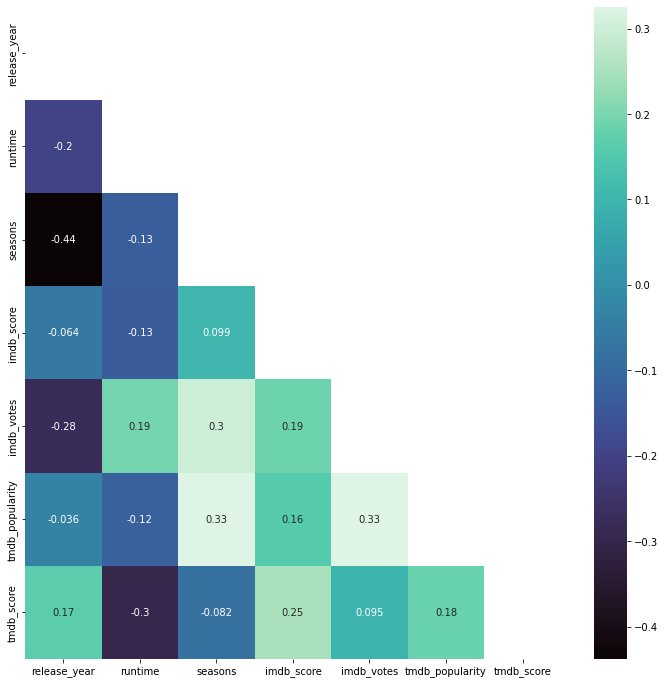

In [7]:
f,ax=plt.subplots(figsize=(12,12))
data = df.loc[lambda df:df['imdb_score'] > 8.0]
matrix = np.triu(data.corr())
sn.heatmap(data.corr(), annot=True, mask=matrix, cmap='mako')
plt.show()

In [8]:
df.columns


Index(['id', 'title', 'type', 'description', 'release_year',
       'age_certification', 'runtime', 'genres', 'production_countries',
       'seasons', 'imdb_id', 'imdb_score', 'imdb_votes', 'tmdb_popularity',
       'tmdb_score'],
      dtype='object')

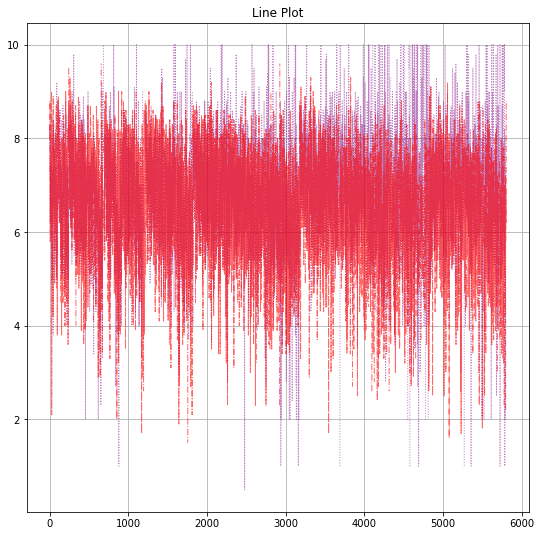

In [9]:
#Line Plot
df.tmdb_score.plot(kind = 'line', 
                     color = 'purple',
                     label = 'Release Year',
                     linewidth=1,
                     alpha = 0.5,
                     grid = True,
                     linestyle = ':',
                     figsize=(12,12))
df.imdb_score.plot(kind = 'line', 
                     color = 'red',
                     label = 'Release Year',
                     linewidth=1,
                     alpha = 0.6,
                     grid = True,
                     linestyle = '-.',
                     figsize=(9,9))

plt.title('Line Plot')            
plt.show()

<AxesSubplot:>

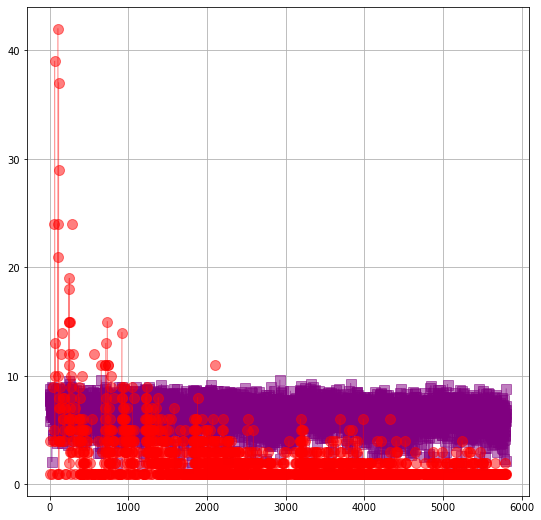

In [10]:
df.imdb_score.plot(kind = "line", 
                   color = "purple",
                   label = "tmdb score",
                   linewidth = 1, 
                   alpha = 0.5, 
                   grid = True,
                   figsize=(9,9), 
                   marker='s', 
                   ms=10)
df.seasons.plot(kind = "line", 
                   color = "red",
                   label = "tmdb score",
                   linewidth = 1, 
                   alpha = 0.5, 
                   grid = True,
                   figsize=(9,9), 
                   marker='o', 
                   ms=10)



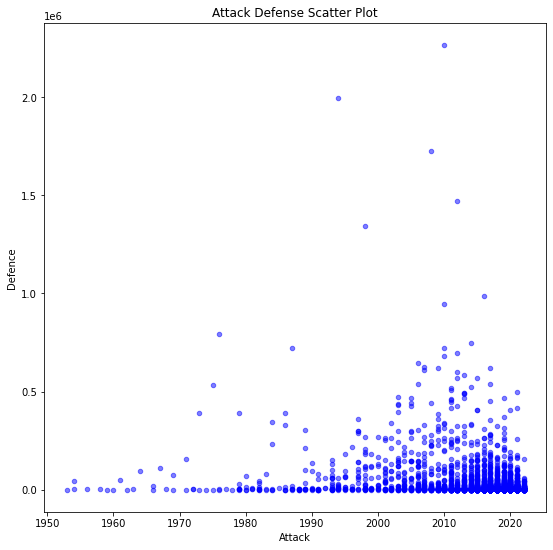

In [11]:
#Scatter Plot
df.plot(kind='scatter', x='release_year', y='imdb_votes',alpha = 0.5,color = 'blue',figsize=(9,9))
plt.xlabel('Attack')              
plt.ylabel('Defence')
plt.title('Attack Defense Scatter Plot') 
plt.show()

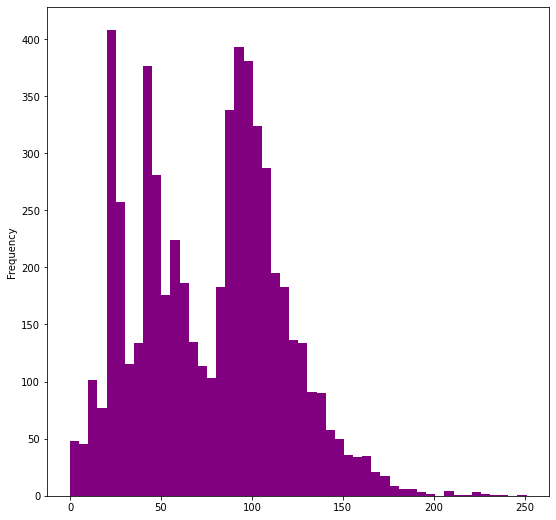

In [12]:
df.runtime.plot(kind = 'hist',bins = 50,figsize = (9,9),color='purple')
plt.show()

In [13]:
df['age_certification'].value_counts(dropna =False)

NaN      2610
TV-MA     841
R         575
TV-14     470
PG-13     440
PG        246
TV-PG     186
G         131
TV-Y7     112
TV-Y      105
TV-G       76
NC-17      14
Name: age_certification, dtype: int64

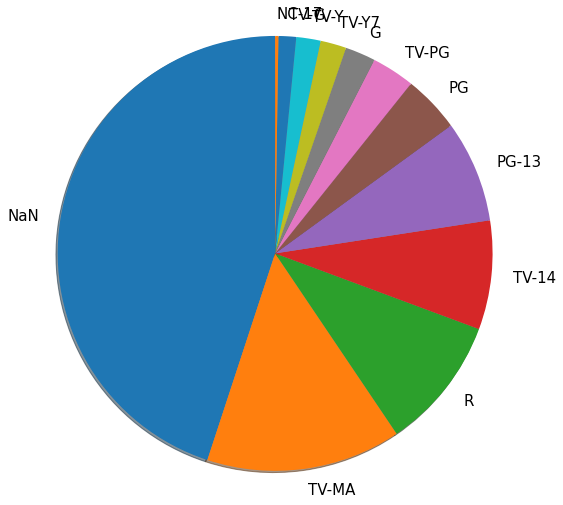

In [14]:
#Pie Plot
age_certification = [2610,841,575,470,440,246,186,131,112,105,76,14]
headlines = ['NaN','TV-MA','R','TV-14','PG-13','PG','TV-PG','G','TV-Y7','TV-Y','TV-G','NC-17']
plt.pie(age_certification,labels=headlines,startangle=90, shadow= True,radius = 2.5, textprops={'fontsize': 15})
plt.show()